# Veränderungen in der Fertilitätsrate

Gruppe: Silja Häsler, Nadja Kuhn, Melina Kraus


Projektidee:

Wir untersuchen, in welchen zehn Länder von 1980 bis 2023 die Fertalitätsrate am meisten abgenommen hat und recherchieren möglich Gründe dafür. 

Frage:
- Sinkt die globale Fertilitätsrate vorallem wegen steigender Bildung der Frauen?

Quelle der Daten:
- https://ourworldindata.org/grapher/children-per-woman-un?time=2023&mapSelect=~OWID_KOS&overlay=download-data



## 1. Daten beschaffen und laden

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# loading the data
df = pd.read_csv('children-per-woman-un.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Fertilitätsrate']) 
df.head()  

,Gebiet,Code,Jahr,Fertilitätsrate
0,Afghanistan,AFG,1950,7.248
1,Afghanistan,AFG,1951,7.260
2,Afghanistan,AFG,1952,7.260
3,Afghanistan,AFG,1953,7.266
4,Afghanistan,AFG,1954,7.254


## 2. Daten vorbereiten 


In [5]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='Fertilitätsrate')
df_pivot_1980 = df_pivot.loc[:,1980:2023]
df_pivot_1980.head()


Jahr,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.643,7.617,7.600,7.570,7.554,7.550,7.553,7.548,7.551,7.559,...,5.770,5.652,5.542,5.433,5.327,5.238,5.145,5.039,4.932,4.840
Africa (UN),6.589,6.548,6.509,6.460,6.394,6.322,6.244,6.169,6.092,6.004,...,4.686,4.625,4.545,4.482,4.391,4.312,4.242,4.179,4.125,4.072
Albania,3.590,3.468,3.416,3.319,3.282,3.214,3.141,3.106,3.069,3.030,...,1.721,1.631,1.555,1.486,1.415,1.395,1.371,1.365,1.355,1.348
Algeria,6.994,6.845,6.675,6.496,6.283,6.035,5.645,5.298,5.023,4.761,...,3.084,3.091,3.091,3.090,3.019,2.997,2.940,2.870,2.817,2.766
American Samoa,4.627,4.498,4.370,4.267,4.250,4.255,4.276,4.298,4.314,4.410,...,2.852,2.780,2.699,2.598,2.494,2.404,2.360,2.327,2.305,2.286


## 3. Statistik der Roh-Daten (Analyse im Long-Format)



In [6]:
df.dtypes

Gebiet              object
Code                object
Jahr                 int64
Fertilitätsrate    float64
dtype: object

### 3.1 Analyse Gebiete

In [7]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  253


In [8]:
# Anzahl Datenpunkte pro Gebiet
df['Gebiet'].value_counts()

Gebiet
Afghanistan      74
Pakistan         74
New Caledonia    74
New Zealand      74
Nicaragua        74
                 ..
Guatemala        74
Guernsey         74
Guinea           74
Guinea-Bissau    74
Zimbabwe         74
Name: count, Length: 253, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

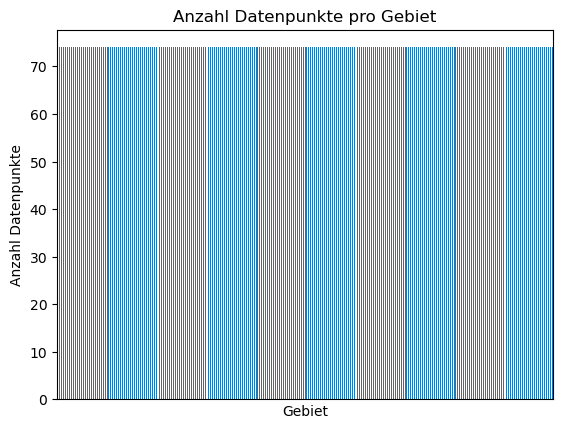

In [9]:
df['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],     
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

### 3.2 Analyse Codes

In [10]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  239


In [11]:
# Anzahl Datenpunkte pro Gebiet
df['Code'].value_counts()

Code
AFG    74
PAN    74
NIC    74
NER    74
NGA    74
       ..
GRD    74
GLP    74
GUM    74
GTM    74
ZWE    74
Name: count, Length: 238, dtype: int64

### 3.3 Analyse Jahr

In [12]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  74


In [13]:
# Anzahl Datenpunkte pro Jahr
df['Jahr'].value_counts().sort_index()

Jahr
1950    253
1951    253
1952    253
1953    253
1954    253
       ... 
2019    253
2020    253
2021    253
2022    253
2023    253
Name: count, Length: 74, dtype: int64

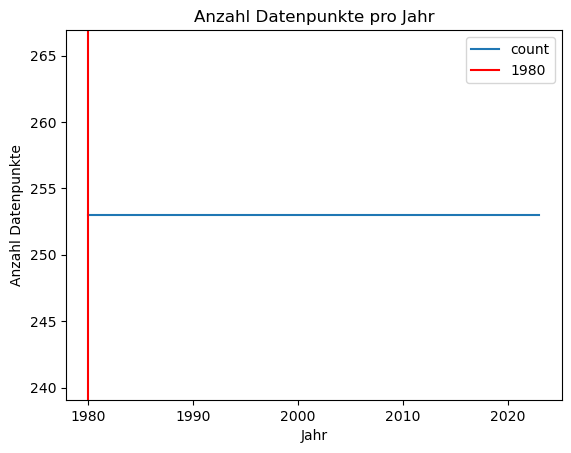

In [14]:
df_1980 = df[df['Jahr'] >= 1980]
g = df_1980['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=1980, color='red',label='1980') 
g.legend();

### 3.4 Analyse Lebenserwartung

In [15]:
df.describe()

,Jahr,Fertilitätsrate
count,18722.00000,18722.000000
mean,1986.50000,3.961614
std,21.36058,2.005870
min,1950.00000,0.662000
25%,1968.00000,2.131250
50%,1986.50000,3.521000
75%,2005.00000,5.899750
max,2023.00000,8.864000


## 4. Analyse 

### Vorgehen

### Beobachtungen 
- Unsere Top Zehn Länder, in der Abnahme der Fertilitätsrate, sind: 
1. United Arab Emirates mit -79.842%
2. Maldives             mit -78.203%
3. Buthan               mit -77.545%
4. Wallis and Futana    mit -76.389%
5. Cape Verde           mit -76.125%
6. Iran                 mit -74.434%
7. South Korea          mit -73.664%
8. Kuwait               mit -70.582%
9. Libya                mit -68.779%
10. Saint Lucia         mit -66.774%

## Graphik Entwicklung der Top 10 Länder (reformiert auf 100% im Startjahr)
1. United Arab Emirates (dunkel blau)
    - Sehr starker, ziemlich kontinuierlicher Rückgang über die gesamte Periode
    - Ab späten 80ern/90ern klar beschleunigt, danach weiter fallend bis sehr tiefes Niveau
    - "fast monotone" Abwärtskurve

2. Maldives (orange)
    - Zuerst relativ stabil, dann starker Knick ab frühen/mittleren 90ern
    - Danach rascher Abfall bis Anfang 200er, anschliesslich flacht es ab

3. Bhutan (grün)
    - Ab 90ern bis cia. 2010 klar fallend, danach eher langsam weiter runter

4. Wallis and Futuna (rot)
    - Auffällig: starke Sprünge/Zacken
    - deutliche abwärts, aber mit mehreren "Störungen"

5. Cape Verde (violett)
    - Langsamere Abnahme bis späte 80ern, dann stärkerer Rückgang in den 90ern/2000ern
    - Ab ca. 2010 weiter fallend, aber weniger steil

6. Iran (braun)
    - Sehr markant: extrem steiler Drop in kurzer Zeit (90ern/frühen 2000ern)
    - Danach lange, flächere aber immer noch fallende Phase

7. South Korea (pink)
    - Starker Fall zwischen 1980 und 1990, welcher sich wieder erholte in den späten 90ern und Anfangs 2000ern
    - Jedoch ist der Trend, danach fallend und mit kleinen Erhohlungsphasen wie z.B. in 2010

8. Kuwait (grau)
    - Starker Rückgang, aber später (ab 2000er/2010er) eine lange flachere Phase
    - Gegen Ende ein deutlicher Knick (um 2020 herum sichtbar)

9. Libya (limmettengrün)
    - Schneller Abfall bis ca. Ende 90er/2000, danach flacher (langsamer weiter sinkend)

10. Saint Lucia (hellblau)
    - Klar, abwärts, aber mit mehereren Zwischenphasen und kleinen Aufwärtsbewegungen (um 90ern/2000er)
    - Trend eindeutig, kurzfristige Schwankungen

Insgesamt liegt ein vollständiger Datensatz vor der 74 Jahre umfasst und für jedes Jahr Daten zu 253 Ländern enthält.




### Interpretation 

Die Daten zeigen, dass die Fertilitätsrate in allen zehn betrachteten Ländern zwischen 1980 und 2023 sehr stark zurückgegangen ist. Zu diesen Ländern gehören die Vereinigten Arabischen Emiraten, die Malediven, Bhutan, Wallis and Futuna, Cape Verde, der Iran, Südkorea, Kuwait, Libyen und Saint Lucia. In allen Fällen liegt die Abnahme bei über 60%, teilweise sogar nahe bei 80%, was auf einen langfristigen und strukturellen Trend hinweist.

Eine mögliche Erklärung für diesen starken Rückgang liegt im steigenden Bildungsniveau, insbesondere bei Frauen. Mit höherer Bildung verschiebt sich die Familiengründung häufig nach hinten oder fällt ganz aus, da Ausbildung und Beruf an Bedeutung gewinnen. Dieser Zusammenhang wird auch in den verlinkten Artikeln beschrieben und passt gut zu den Daten, da der Rückgang in vielen dieser Länder zeitlich mit Phasen gesellschaftlicher Modernisierung zusammenfällt.

Zusätzlich lässt sich der Rückgang durch einen gesellschaftlichen Wertewandel erklären. Traditionelle Familienmodelle verlieren an Bedeutung, während individuelle Lebensplanung, Selbstverwirklichung und finanzielle Unabhängigkeit wichtiger werden. Dass dieser Wandel nicht auf einzelne Länder beschränkt ist, zeigt sich daran, dass alle zehn Länder, trotz unterschiedlicher kultureller und wirtschaftlicher Voraussetzungen, denselben Abwärtstrend aufweisen.

Auch wirtschaftliche Faktoren spielen vermutlich eine zentrale Rolle. Hohe Lebenshaltungskosten, unsichere Arbeitsverhältnisse und Schwierigkeiten bei der Vereinbarkeit von Beruf und Familie können dazu führen, dass Paare weniger Kinder bekommen als ursprünglich geplant. In diesem Zusammenhang könnte auch die Wirtschaftskrise von 2008 eine zusätzliche Rolle gespielt haben, da finanzielle Unsicherheit und Zukunftsängste dazu führen können, dass Kinderwünsche aufgeschoben oder ganz aufgegeben werden.

Darüber hinaus könnte die Corona-Pandemie den bestehenden Trend weiter verstärkt haben. Der erhöhte Stress, gesundheitliche Unsicherheiten und die allgemeine Belastung in dieser Zeit könnten dazu geführt haben, dass sich viele Menschen weniger auf Familienplanung konzentrierten. Dies passt dazu, dass in den letzten Jahren keine Erholung der Fertilitätsraten erkennbar ist.

Insgesamt legen die Daten nahe, dass der starke Rückgang der Fertilitätsraten in den Vereinigten Arabischen Emiraten, auf den Malediven, in Bhutan, Wallis and Futuna, Cape Verde, im Iran, in Südkorea, in Kuwait, in Libyen und in Saint Lucia vor allem auf Bildung, wirtschaftliche Rahmenbedingungen und gesellschaftliche Veränderungen zurückzuführen ist. Krisen wie die Finanzkrise 2008 und die Corona-Pandemie haben diesen langfristigen Trend vermutlich zusätzlich verstärkt, ohne ihn grundsätzlich zu verursachen.

Quellen: 
- https://www.dia-vorsorge.de/starker-geburtenrueckgang-in-krisenzeiten/
- https://www.derbund.ch/un-veroeffentlicht-studie-wieso-die-geburtenrate-zurueckgeht-434004044367
- https://www.20min.ch/story/analyse-warum-wir-weniger-kinder-kriegen-und-welche-gefahren-das-birgt-103363471 
- https://www.tagesanzeiger.ch/geburten-weltweiter-rueckgang-laut-forschern-unumkehrbar-544070848724


### Berechnungen

In [16]:
diffs = ((df_pivot_1980[2023]-df_pivot_1980[1980])/df_pivot_1980[1980])*100  # Differenz zwischen 1980 und 2023
diffs_sorted = diffs.sort_values()
diffs_sorted.head(10)

Gebiet
United Arab Emirates   -79.842096
Maldives               -78.203709
Bhutan                 -77.545692
Wallis and Futuna      -76.389819
Cape Verde             -76.125490
Iran                   -74.434389
South Korea            -73.664960
Kuwait                 -70.582562
Libya                  -68.779000
Saint Lucia            -68.744334
dtype: float64

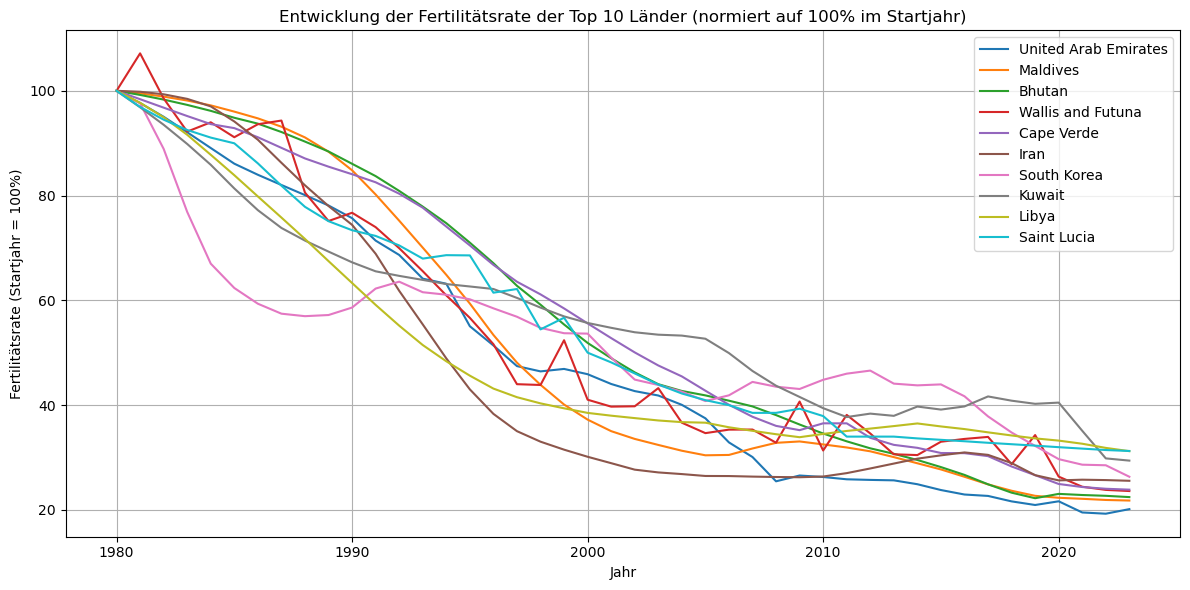

In [17]:
top10_laender = diffs_sorted.head(10).index.tolist()

df_selected = df_pivot_1980.loc[top10_laender]

plt.figure(figsize=(12,6))

df_norm = df_selected.div(df_selected.iloc[:, 0], axis=0) * 100

for land in df_norm.index:
    plt.plot(df_norm.columns, df_norm.loc[land], label=land)

plt.xlabel("Jahr")
plt.ylabel("Fertilitätsrate (Startjahr = 100%)")
plt.title("Entwicklung der Fertilitätsrate der Top 10 Länder (normiert auf 100% im Startjahr)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Prozentuale Abnahme der Fertilitätsrate zwischen 1980-2023'}, ylabel='Gebiet'>

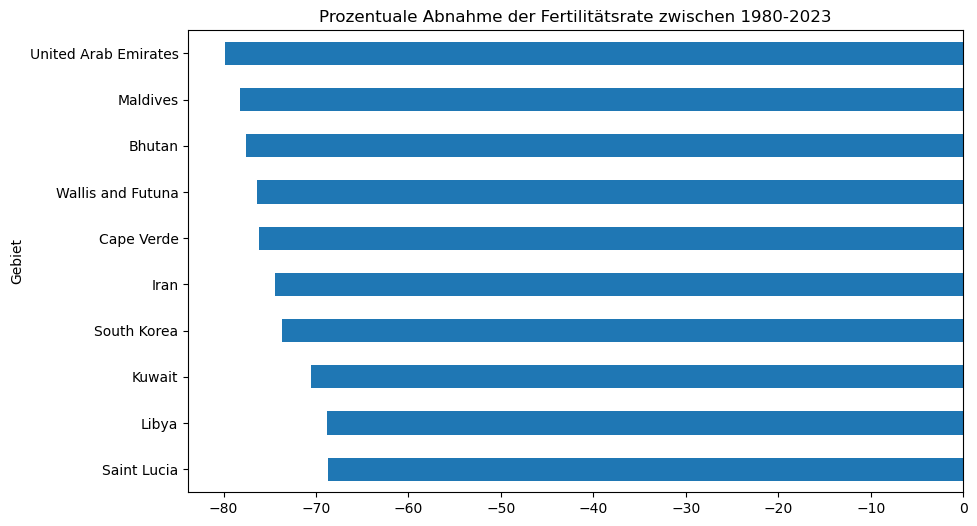

In [22]:

diffs_sorted.head(10).sort_values(ascending=False).plot(
    kind='barh',
    figsize=(10, 6),
    title='Prozentuale Abnahme der Fertilitätsrate zwischen 1980-2023'
)

### Visualisierung

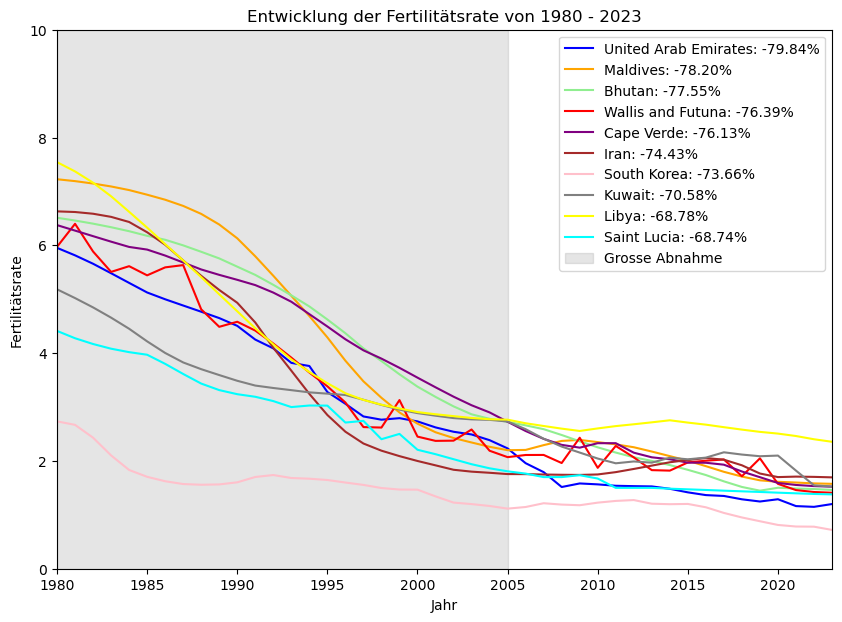

In [21]:
color_dict = {
    'United Arab Emirates': 'blue',
    'Maldives': 'orange',
    'Bhutan': 'lightgreen',
    'Wallis and Futuna': 'red',
    'Cape Verde': 'purple',
    'Iran': 'brown',
    'South Korea': 'pink',
    'Kuwait': 'grey',
    'Libya': 'yellow',
    'Saint Lucia': 'cyan'
}

for land in top10_laender:
    diff = diffs[land]
    g = df_pivot_1980.loc[land].plot(title='Entwicklung der Fertilitätsrate von 1980 - 2023', xlabel='Jahr', ylabel=f'Fertilitätsrate', legend=True,
                                  label=f'{land}: {diff:.2f}%', 
                                  xlim=[1980,2023], ylim=[0,10],   
                                  color=color_dict[land],        
                                  figsize=(10,7))                   


plt.axvspan(1980, 2005, color='grey', alpha=0.2, label='Grosse Abnahme')
plt.legend()
#Grauer Berich markiert die Jahre mit grösseren Abnahmen

